In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randrange
import itertools
import pandas as pd
import numpy as np
import math
import random
import io

# Evaluation


In [2]:
def predict(w, x):
    y_predict = np.dot(w, x.T)
    return y_predict

def mean_square_error(y, y_predict):
    return np.square(np.subtract(y, y_predict)).mean() 

<a name="cell-id"></a>
# **7.1**

In [2]:
df = pd.read_csv('FirstDataset.txt', sep='\t', header=None)
df.columns = ['Feature1','Tag']
df['ConstFeature'] = [1] * 320
plt.rcParams['figure.figsize'] = (12.0, 9.0)
X = df.loc[:, ['Feature1', 'ConstFeature']]
Y = df.iloc[:, 1]
X_train = np.array(df.loc[:, ['Feature1', 'ConstFeature']])
Y_train = np.array(df.iloc[:, 1])
X.shape, Y.shape

((320, 2), (320,))



## 1.   Closed Form



w =  [ 0.83550241 -3.12460718]


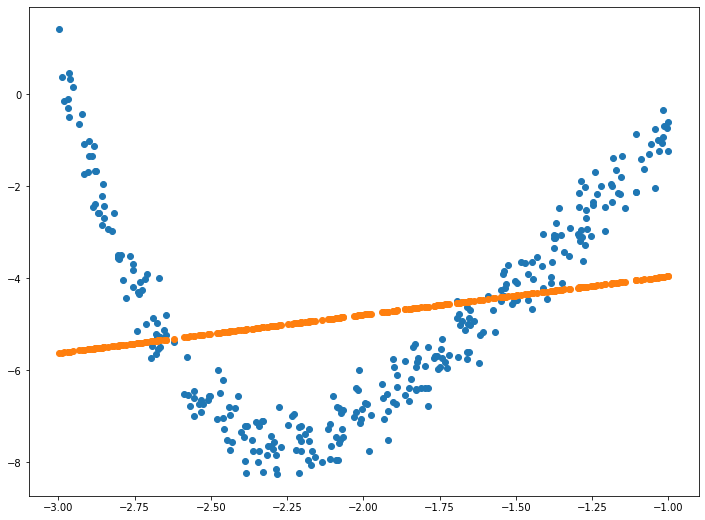

4.898056653258607

In [6]:
def Closed_Form(x, y):
  a = np.dot(x.T, x)
  b = np.dot(x.T, y)
  n = len(x)
  w = np.dot(np.linalg.inv(a), b)
  return w

w = Closed_Form(X_train, Y_train)
print("w = ", w)
Y_predict = predict(w, X_train)
plt.scatter(X['Feature1'], Y)
plt.scatter(X['Feature1'], Y_predict)
plt.show()
mean_square_error(Y, Y_predict)

## 2.   Gradient Descent






w=  [ 0.83550556 -3.12460042]


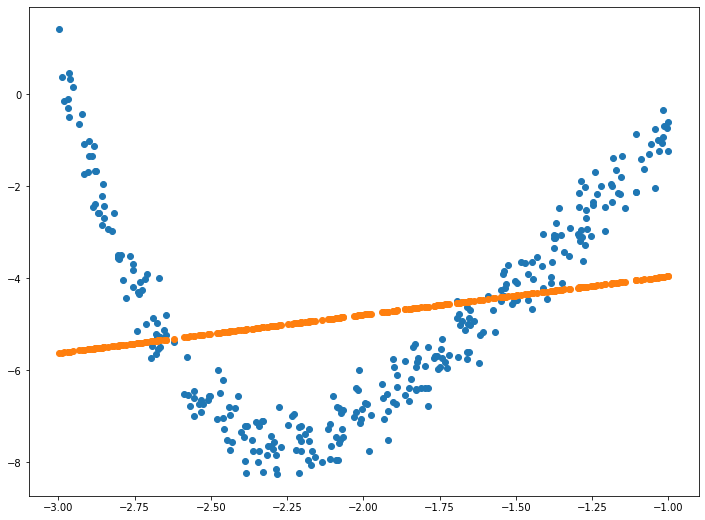

4.898056653262126

In [7]:
def Gradient_Descent(x, y, learning_rate, iterations):
  w = np.zeros(x.shape[1])
  n = x.shape[0]
  for i in range(iterations):
    w_grad = np.zeros(x.shape[1])
    for j in range(n):
      w_grad += (-2/n) * (y[j] - (np.dot(w.T, x[j]))) * x[j]
    w = w - learning_rate * w_grad
  return w
w = Gradient_Descent(X_train, Y_train, 0.1, 1000)
print("w= ", w)
Y_predict = predict(w, X_train)
plt.scatter(X['Feature1'], Y)
plt.scatter(X['Feature1'], Y_predict)
plt.show()
mean_square_error(Y, Y_predict)



## 3.   Stochastic Gradient Descent



w=  [ 0.91439213 -2.84264671]


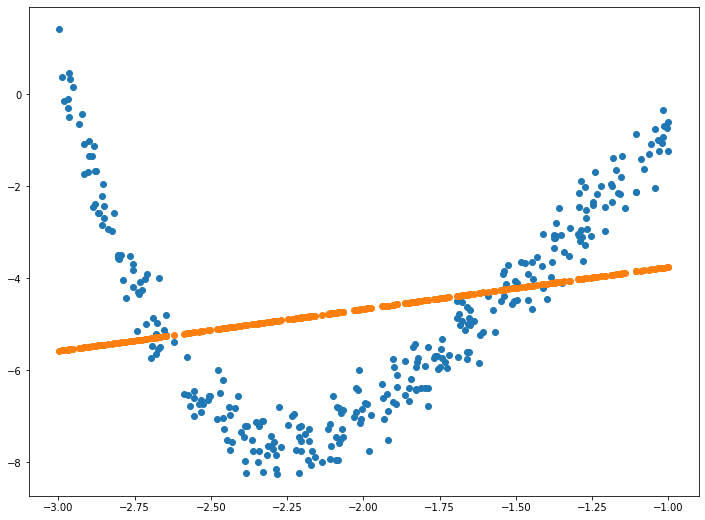

4.91543936716429

In [30]:
def Stochastic_Gradient_Descent(data, learning_rate, iterations, k):
  sample = data.sample(k)
  y = np.array(sample['Tag'])
  x = np.array(sample.drop('Tag',axis=1))
  w = np.zeros(x.shape[1])
  n = x.shape[0]
  for i in range(iterations):
    w_grad = np.zeros(x.shape[1])
    for j in range(k):
      w_grad += (-2/n) * (y[j] - (np.dot(w.T, x[j]))) * x[j]
    w = w - learning_rate * w_grad
  return w
w = Stochastic_Gradient_Descent(df, 0.1, 1000, 100)
print("w= ", w)
Y_predict = predict(w, X_train)
plt.scatter(X['Feature1'], Y)
plt.scatter(X['Feature1'], Y_predict)
plt.show()
mean_square_error(Y, Y_predict)

<div style="direction:rtl"> همانطور که در نمودار های فوق نیز مشخص می باشد، دو روش اول که فرم بسته و گرادیان هستند خطای تقریبا مشابهی تولید می کنند اما روش stochastic کمی خطای بیشتری دارد که این امر هم بستگی به مقدار k دارد و این خطا متناسب با مقادیر مختلف نیز تغییر میکند </div>

# 7.2

## Read The Data

In [ ]:
df2 = pd.read_csv('SecondDataset.txt', sep='\t', header=None)
df2.columns = ['F1', 'F2', 'F3', 'Tag']
df2['F0'] = [1] * 506
df2

## Normalization

In [11]:
def normalization(arr):
  norm_train = np.linalg.norm(arr)
  return arr/norm_train

## Split into Train and Test

In [12]:
train = df2.sample(frac=0.8, random_state=0)
test = df2.drop(train.index)

x_train = train.loc[:, ['F0', 'F1', 'F2', 'F3']]
x_train_array = np.array(x_train)
x_train_array = normalization(x_train_array)
y_train = train['Tag']
y_train_array = np.array(y_train)
y_train_array = normalization(y_train_array)

x_test = test.loc[:, ['F0', 'F1', 'F2', 'F3']]
x_test_array = np.array(x_test)
x_test_array = normalization(x_test_array)
y_test = test['Tag']
y_test_array = np.array(y_test)
y_test_array = normalization(y_test_array)

## Gradient Descent

In [15]:
def Gradient_Descent_MSE(x, y, learning_rate, iterations):
  w = np.zeros(x.shape[1])
  n = x.shape[0]
  for i in range(iterations):
    w_grad = np.zeros(x.shape[1])
    for j in range(n):
      # print(np.dot(w.T, x[j]), y[j], x[j])
      w_grad += (-2/n) * (y[j] - (np.dot(w.T, x[j]))) * x[j]
    w = w - learning_rate * w_grad
  return w

## Gradient Descent With Regularization

In [14]:
def Gradient_Descent_MSE_Reg(x, y, l, learning_rate, iterations):
  w = np.zeros(x.shape[1])
  n = x.shape[0]
  for i in range(iterations):
    w_grad = np.zeros(x.shape[1])
    for j in range(n):
      w_grad += (-2/n) * (y[j] - (np.dot(w.T, x[j]))) * x[j]
    w_grad += (2/n) * (l * w)
    w = w - (learning_rate * w_grad)
  return w

## 1. 


In [16]:
w = Gradient_Descent_MSE(x_train_array, y_train_array, 0.1, 1000)
print("w= ", w)
y_train_predict = predict(w, x_train_array)
y_test_predict = predict(w, x_test_array)
print("mean_square_error for train data:", mean_square_error(y_train_array, y_train_predict), "\nmean_square_error for test data:", mean_square_error(y_test_array, y_test_predict))

w=  [0.03518332 0.06550346 0.01867233 0.22907337]
mean_square_error for train data: 0.0018829897233175448 
mean_square_error for test data: 0.006688457045339118


## PrePare 3rd degree model

In [ ]:
PN = PolynomialFeatures(degree=3)
x_3_train_array = PN.fit_transform(x_train[['F1', 'F2', 'F3']])
x_3_test_array = PN.fit_transform(x_test[['F1', 'F2', 'F3']])

x_3_train_array = normalization(x_3_train_array)
x_3_test_array = normalization(x_3_test_array)
x_3_train_array, x_3_test_array

## 2

In [18]:
w = Gradient_Descent_MSE(x_3_train_array, y_train_array, 0.1, 1000)
print("w= ", w)
y_3_train_predict = predict(w, x_3_train_array)
y_3_test_predict = predict(w, x_3_test_array)
print("mean_square_error for train data:", mean_square_error(y_train_array, y_3_train_predict), "\nmean_square_error for test data:", mean_square_error(y_test_array, y_3_test_predict))

w=  [1.02813861e-05 2.27898283e-05 5.48809279e-06 6.67630306e-05
 4.21008055e-04 1.50430107e-05 1.36499821e-04 3.04872113e-06
 3.54143565e-05 4.39820293e-04 1.73260000e-02 2.80217844e-04
 2.48820241e-03 1.00463160e-05 8.99871720e-05 8.33520301e-04
 1.76662600e-06 1.95368364e-05 2.32074572e-04 2.93945531e-03]
mean_square_error for train data: 0.002465912163636314 
mean_square_error for test data: 0.009857858230163484


## 3

w=  [1.00319839e-05 2.22426790e-05 5.35497708e-06 6.51434837e-05
 4.11227850e-04 1.46819330e-05 1.33224467e-04 2.97478046e-06
 3.45553483e-05 4.29150864e-04 1.69397946e-02 2.73712009e-04
 2.43062631e-03 9.80520141e-06 8.78284369e-05 8.13529516e-04
 1.72378392e-06 1.90629974e-05 2.26445259e-04 2.86814688e-03]
w=  [9.11180608e-06 2.02231343e-05 4.86384036e-06 5.91681152e-05
 3.75081082e-04 1.33491722e-05 1.21134771e-04 2.70197180e-06
 3.13859993e-05 3.89785709e-04 1.55099615e-02 2.49666460e-04
 2.21779615e-03 8.91522823e-06 7.98602289e-05 7.39739890e-04
 1.56571484e-06 1.73147410e-05 2.05675682e-04 2.60505265e-03]
w=  [8.11604154e-06 1.80360461e-05 4.33235630e-06 5.27019183e-05
 3.35839356e-04 1.19058200e-05 1.08041573e-04 2.40674957e-06
 2.79562913e-05 3.47187083e-04 1.39527677e-02 2.23560947e-04
 1.98667458e-03 7.95139779e-06 7.12304649e-05 6.59822500e-04
 1.39465789e-06 1.54228538e-05 1.83199939e-04 2.32034813e-03]
w=  [6.53579585e-06 1.45607583e-05 3.48889872e-06 4.24403020e-05
 2.73

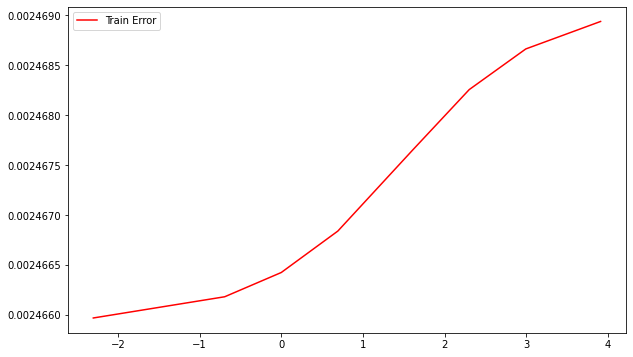

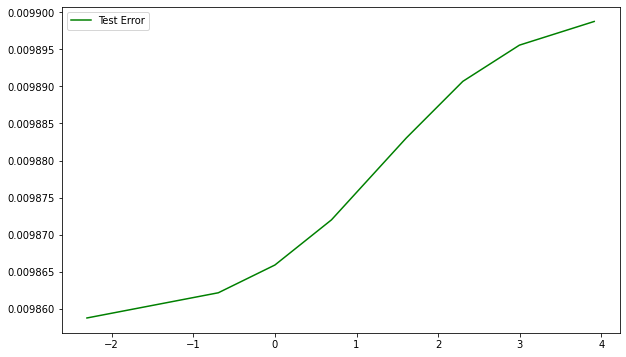

In [28]:
ls = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
lns = np.log(ls)
tr_errors = []
te_errors = []
for l in ls:
  w = Gradient_Descent_MSE_Reg(x_3_train_array, y_train_array, l, 0.1, 1000)
  print("w= ", w)
  y_3_train_predict = predict(w, x_3_train_array)
  y_3_test_predict = predict(w, x_3_test_array)
  tr_errors.append(mean_square_error(y_train_array, y_3_train_predict))
  te_errors.append(mean_square_error(y_test_array, y_3_test_predict))

print("mean_square_error for train data:", tr_errors, "\nmean_square_error for test data:", te_errors)

plt.figure(figsize=(10,6))
plt.plot(lns,tr_errors,color='r',label='Train Error')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(lns,te_errors,color='g',label='Test Error')
plt.legend()
plt.show()

# 7.3

In [25]:
def cross_validation_split(dataset, count):
  folds = []
  dataset_ = list(dataset)
  fold_size = int(len(dataset) / count)
  for i in range(count):
    fold = []
    while len(fold) < fold_size:
      index = randrange(len(dataset_))
      dataset_.pop(index)
      fold.append(index)
    folds.append(fold)
  return folds

[1.01009504e-06 2.42927746e-06 5.43525438e-07 6.62707867e-06
 5.56821975e-05 1.61822397e-06 1.47743215e-05 3.03636893e-07
 3.54494720e-06 4.42077804e-05 2.65976820e-03 3.75773408e-05
 3.34370547e-04 1.08816335e-06 9.82229799e-06 9.11609063e-05
 1.76304705e-07 1.96771844e-06 2.35248055e-05 3.00005504e-04]
[1.02508998e-06 2.38111148e-06 5.45269647e-07 6.75900795e-06
 5.69832136e-05 1.58696970e-06 1.44156005e-05 3.00935166e-07
 3.57280597e-06 4.53336828e-05 2.76470597e-03 3.85321837e-05
 3.38377687e-04 1.06786907e-06 9.58614367e-06 8.86487245e-05
 1.72612129e-07 1.95839652e-06 2.38317260e-05 3.09460217e-04]
[1.01900995e-06 2.36452653e-06 5.46451405e-07 6.70539713e-06
 5.36828640e-05 1.58122199e-06 1.42981660e-05 3.03951467e-07
 3.57720077e-06 4.48983033e-05 2.56417374e-03 3.66690840e-05
 3.17966158e-04 1.06745665e-06 9.53354987e-06 8.80182560e-05
 1.75589473e-07 1.97812943e-06 2.38484337e-05 3.06059205e-04]
[1.02007090e-06 2.27139250e-06 5.43122801e-07 6.69688463e-06
 4.63205137e-05 1.509

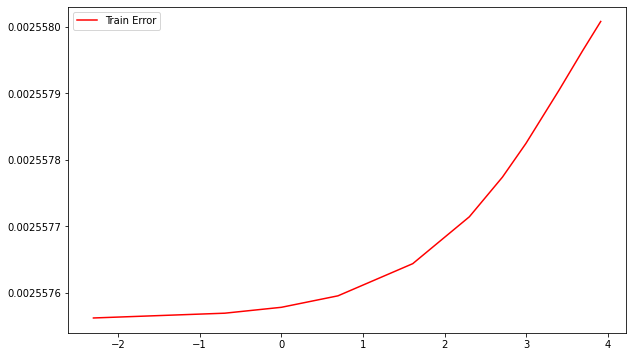

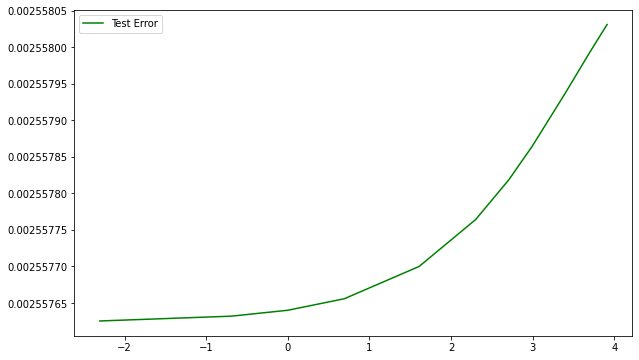

In [31]:
lambdas = [0.1, 0.5, 1, 2, 5, 10, 15, 20, 30, 40, 50]
ln_lambdas = np.log(lambdas)
test_error = []
train_error = []
folds = cross_validation_split(x_3_train_array, 10)
# print(folds)
for l in lambdas:
  train_error_per_fold = 0
  test_error_per_fold = 0
  for i in range(10):
    indxs = list(folds)
    indxs.remove(folds[i])
    indxs = sum(indxs, [])
    # print(len(indxs))
    validation_x = x_3_train_array[folds[i]]
    validation_y = y_train_array[folds[i]]
    train_x = x_3_train_array[indxs]
    train_y = y_train_array[indxs]

    w = Gradient_Descent_MSE_Reg(train_x, train_y, l, 0.1, 100)
    print(w)
    predict_y_validation = predict(w, validation_x)
    test_error_per_fold += mean_square_error(validation_y, predict_y_validation) / 10

    predict_y_train = predict(w, train_x)
    train_error_per_fold += mean_square_error(train_y, predict_y_train) / 10

  # predict_test_y = predict(w, x_3_test_array)
  # test_error.append(mean_square_error(y_test_array, predict_test_y))
  train_error.append(train_error_per_fold)
  test_error.append(test_error_per_fold)
print("mean_square_error for train data:", train_error, "\nmean_square_error for test data:", test_error)
print("minimum lambda for train data", lambdas[np.argmin(train_error)])
print("minimum lambda for test data", lambdas[np.argmin(test_error)])
plt.figure(figsize=(10,6))
plt.plot(ln_lambdas,train_error,color='r',label='Train Error')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(ln_lambdas,test_error,color='g',label='Test Error')
plt.legend()
plt.show()